#Introduction to neural network classification with tensorflow

In this notebook we are going to learn classifictions problems using the tensorflow
a classification is where you try to classify something as one thing or another

Types Of Classification:
 * Multiclass Classification
 * multilabel classification
 * Binaryclassification

#Creating Data to View and Fit

In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples=1000

#create circles
x,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [2]:
#check out features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

our data is a little hard to understand right now ...lets visualize it

In [4]:
import pandas as pd
circles=pd.DataFrame({"X0":x[:,0],"X1":x[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


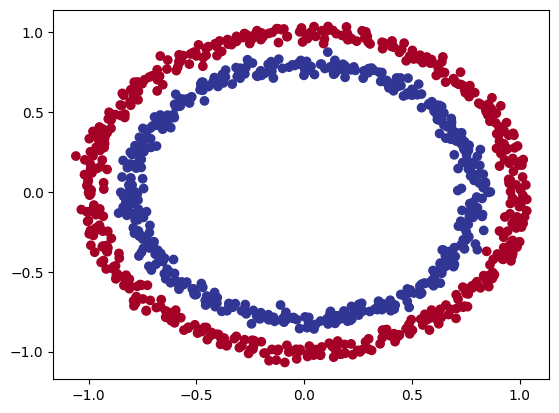

In [5]:
#visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

#input and output shapes

In [6]:
#check the shapes of our features anf lables
x.shape,y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we are working with
len(x),len(y)

(1000, 1000)

In [8]:
#view the first example of features and labels
x[0],y[0]

(array([0.75424625, 0.23148074]), 1)

#Steps In Modeling:

The steps in modeling with tensorflow are typically:
1. create or import a model
2. compile the model
3. fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [9]:
#set the random seed
tf.random.set_seed(42)

#1.create the model using the sequential API
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

#3.fit the model:
model_1.fit(x,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 5.4978 - accuracy: 0.4890
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 3.9817 - accuracy: 0.4890
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7915 - accuracy: 0.4920
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7167 - accuracy: 0.4940
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7020 - accuracy: 0.4960


In [10]:
#lets improve accuracy of the model
model_1.fit(x,y,epochs=200,verbose=0)

In [11]:
model_1.evaluate(x,y)

32/32 [==============================] - 0s 964us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

still there is not much increment in accuracy ,we will try by adding the extra layers

In [12]:
#1.create a model 2 :
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2.compile the model:
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
#3.fit the model
model_2.fit(x,y,epochs=200,verbose=0)

In [13]:
model_2.evaluate(x,y)

32/32 [==============================] - 0s 931us/step - loss: 0.6934 - accuracy: 0.5000


[0.6933718323707581, 0.5]

# Improve Model  


To improve our model, we can alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose a different optimization function (such as the [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer).

In [14]:
tf.random.set_seed(42)
#1create a model with 3 layers
model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(100),# add 100 dense neurons
    tf.keras.layers.Dense(10),# add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

#2.compile the models:
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3.fit the model;
model_3.fit(x,y,epochs=100,verbose=0)

In [15]:
#4.evluate model 4
model_3.evaluate(x,y)

32/32 [==============================] - 0s 967us/step - loss: 0.7024 - accuracy: 0.5110


[0.7023522257804871, 0.5109999775886536]

Still!

We've pulled out a few tricks but our model isn't even doing better than guessing.

Let's make some visualizations to see what's happening.

> 🔑 **Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions we're going to create a function `plot_decision_boundary()` which:
* Takes in a trained model, features (`X`) and labels (`y`).
* Creates a [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) of the different `X` values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).

In [16]:
import numpy as np

In [17]:
def plot_decision_boundary(model,x,y):
  '''
  plots the decision boundary created by model predicting on x.
  '''

  #define  the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:,0].min()- 0.1, x[:,0].max() + 0.1
  y_min, y_max = x[:,1].min()- 0.1, x[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                     np.linspace(y_min,y_max,100))

  #create x value(we re going to make predictions on these)
  x_in=np.c_[xx.ravel(),yy.ravel()]#stack 2d array together

  #make predictions
  y_pred=model.predict(x_in)

  #check for multiclass

  if len(y_pred[0])>1:
    print("doing multiclass classification")
  #we have to reshape our prediction to get them ready for plotting
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)

  else:
    print("doing binary classification")
    y_pred=np.round(y_pred).reshape(xx.shape)

  #plot the decision boundary:
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(x[:,0],x[:,1],s=40,c=y,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 0s 821us/step
doing binary classification


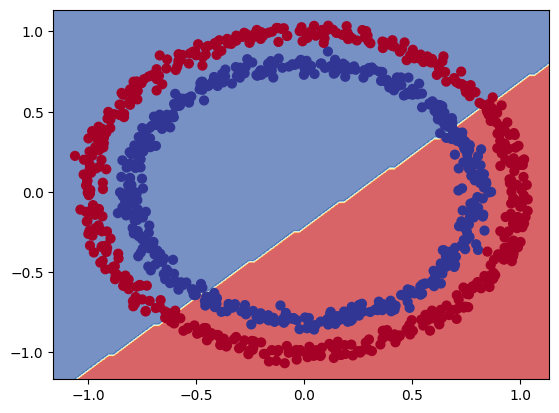

In [18]:
plot_decision_boundary(model=model_3,
                       x=x,y=y)

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
      • training=True
      • mask=None


we run binary classification model for the regression data....we try run it on regression model by chanaging BinaryCrossentropy

In [20]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)



Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 376.6263 - mae: 376.6263
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 272.9781 - mae: 272.9781
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 171.6268 - mae: 171.6268
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 67.0908 - mae: 67.0908
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 66.9455 - mae: 66.9455
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 84.6702 - mae: 84.6702
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 60.4891 - mae: 60.4891
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 43.6185 - mae: 43.6185
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 47.3418 - mae: 47.3418
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 41.6851 - mae: 41.6851
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 4ms/step


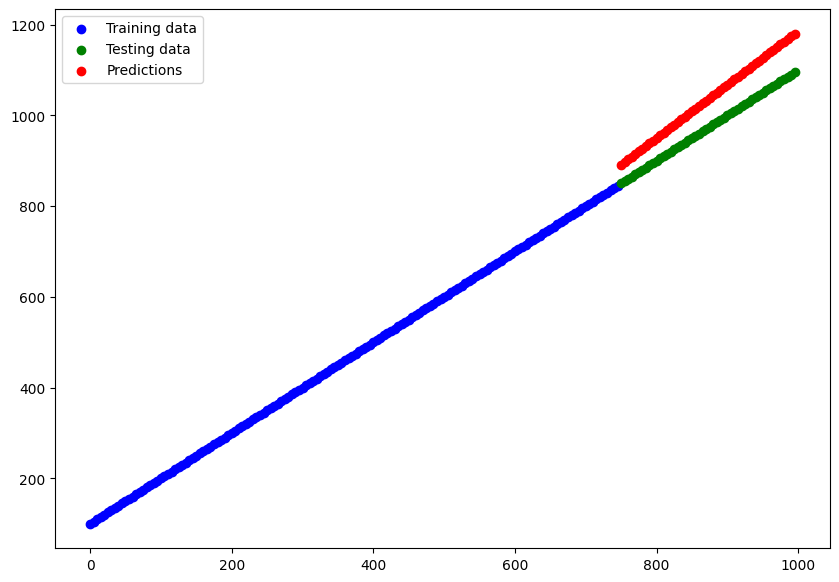

In [21]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

* important piece: Non-Linearity

In [22]:
#set random seed
tf.random.set_seed(42)

#1.create a model:
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])


#2.compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#fit the model
history=model_4.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0590 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0530 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0338 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8808 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8445 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8329 - accuracy: 0.4820
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8322 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8316 - accuracy: 0.4820
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8311 - accuracy: 0.4820
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8306 - accuracy: 0.4810
Epoch 11/

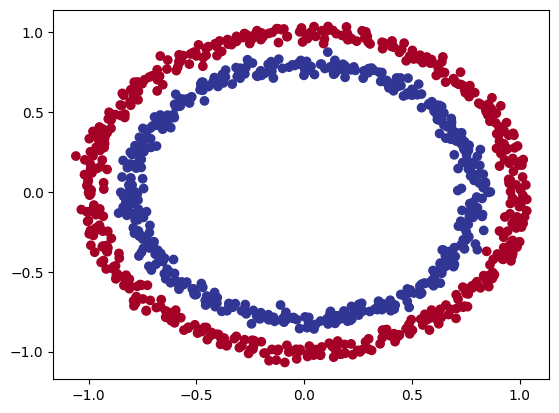

In [23]:
#check out
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


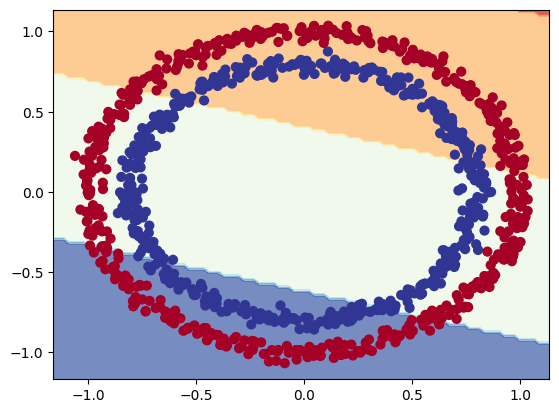

In [24]:
#check out decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       x=x,y=y)

lets try to build out network using the non linear activation function

In [25]:
#set random seed
tf.random.set_seed(42)

#1.create a model:
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

#2.compile the model:
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3.fit the model
history=model_5.fit(x,y,epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [26]:
#time to replicate the multi layers neural network from neural network playground

#set random seed
tf.random.set_seed(42)

#1.crete a multilayered model
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

#2.compile the modell
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

#fit the model
history=model_6.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 1.6661 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.3054 - accuracy: 0.4690
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2164 - accuracy: 0.4710
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1544 - accuracy: 0.4700
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0998 - accuracy: 0.4620
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0510 - accuracy: 0.4650
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0074 - accuracy: 0.4550
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9672 - accuracy: 0.4470
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9301 - accuracy: 0.4510
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8937 - accuracy: 0.4580
Epoch 11/

In [27]:
# Evaluate the model
model_6.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.5735 - accuracy: 0.7720


[0.5734529495239258, 0.7720000147819519]

313/313 [==============================] - 0s 1ms/step
doing binary classification


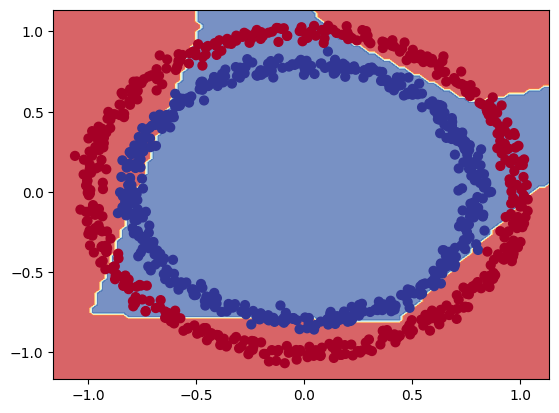

In [28]:
#plot
plot_decision_boundary(model=model_6,x=x,y=y)

In [29]:
# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(x, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.7065 - accuracy: 0.4930
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7030 - accuracy: 0.4950
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7010 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6994 - accuracy: 0.4750
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6986 - accuracy: 0.4650
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6978 - accuracy: 0.4580
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.4670
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.4630
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6959 - accuracy: 0.4520
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.4520
Epoch 11/

In [30]:
model_7.evaluate(x,y)

32/32 [==============================] - 0s 996us/step - loss: 0.6459 - accuracy: 0.6230


[0.6459417343139648, 0.6230000257492065]

313/313 [==============================] - 0s 779us/step
doing binary classification


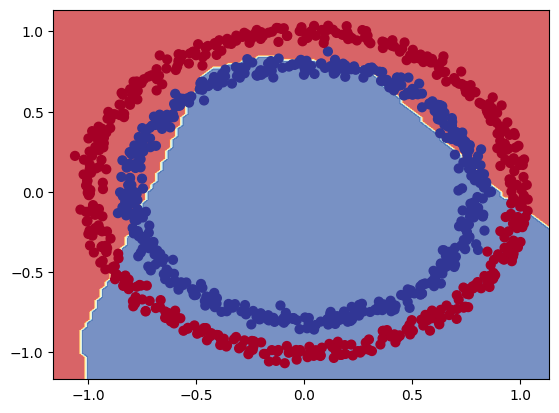

In [31]:
plot_decision_boundary(model=model_7,x=x,y=y)

 🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.


In [32]:
# Create a toy tensor (similar to the data we pass into our model)
A=tf.cast(tf.range(-10,10),dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

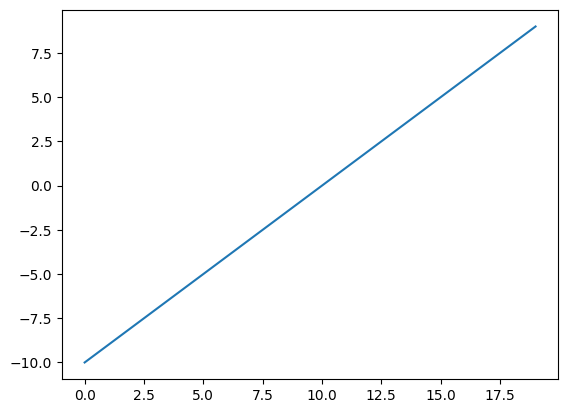

In [33]:
# Visualize our toy tensor
plt.plot(A)

In [34]:
#lets start by replicating the sigmoid function-sigmoid(x)=1/(1+exp(-x))
def sigmoid(x):
  return 1/ (1+ tf.exp(-x))

#lets apply it on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

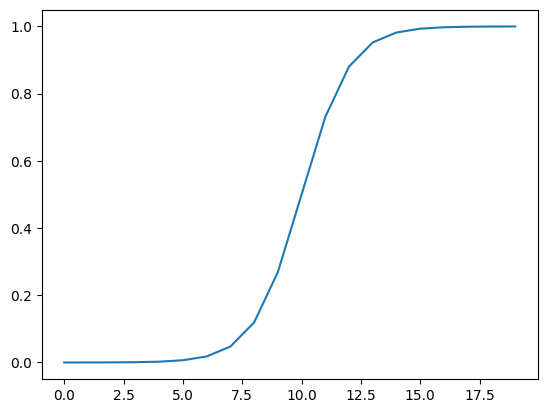

In [35]:
#visualize
plt.plot(sigmoid(A))

In [36]:
#lets recreate the relu function
def relu(x):
  return tf.maximum(0,x)

#lets apply it to toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

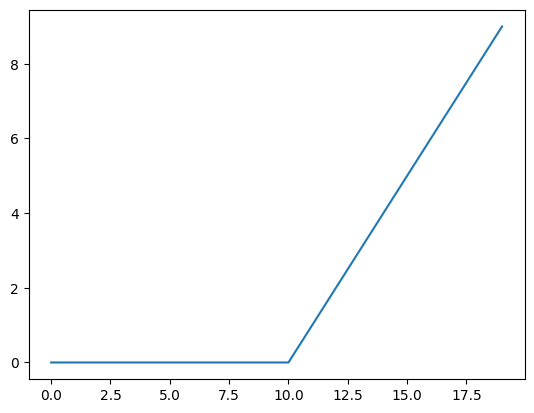

In [37]:
plt.plot(relu(A))

In [38]:
#lets recreate our linear function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

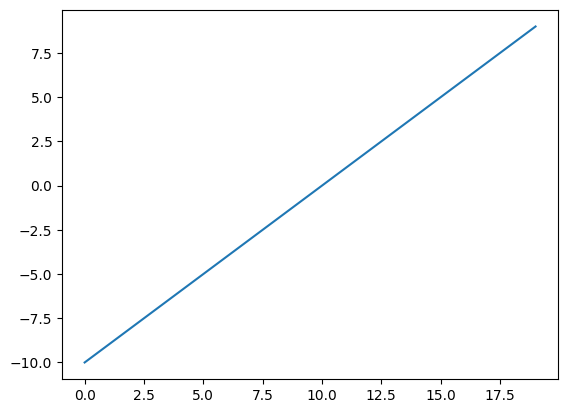

In [39]:
plt.plot(tf.keras.activations.linear(A))

In [40]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

there is no change when we pass tensor to the linear function

# Improving and Evaluating Our classification model:

In [41]:
len(x)

1000

In [42]:
#spilt into train and test sets
x_train,y_train=x[:800],y[:800]
x_test,y_test=x[800:],y[800:]
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [43]:
#lets create model fitting on trained data and evaluate on test data
tf.random.set_seed(42)

#1.create a model(same as model_7)
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#2.compile the model:
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(0.01),#increase lr
                metrics=["accuracy"])

#fit the model:
history=model_8.fit(x_train,y_train,epochs=25)#decrease epochs#

Epoch 1/25
25/25 [==============================] - 1s 1ms/step - loss: 0.6925 - accuracy: 0.5013
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5213
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.5625
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.5825
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6695 - accuracy: 0.6212
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6550 - accuracy: 0.6212
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6359 - accuracy: 0.7025
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6104 - accuracy: 0.6950
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5754 - accuracy: 0.7425
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5368 - accuracy: 0.7638
Epoch 11/25
25/25 [

In [44]:
#4.Evalute on test data
model_8.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9700


[0.15721769630908966, 0.9700000286102295]

313/313 [==============================] - 0s 867us/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


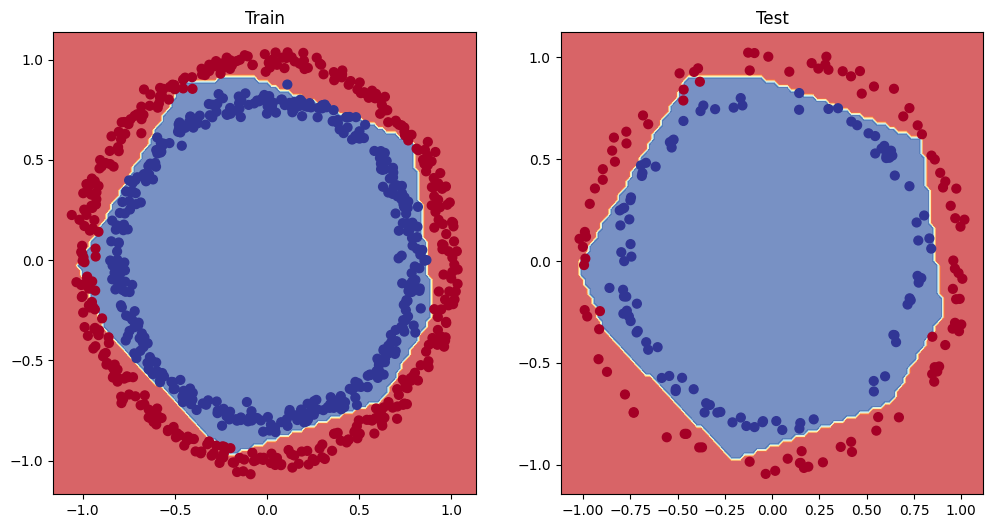

In [45]:
#lets visualize the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_8,x=x_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_8,x=x_test,y=y_test)

#Plot loss curve(trainning curves)

In [46]:
history.history

{'loss': [0.6925212144851685,
  0.6892057657241821,
  0.6838784217834473,
  0.6788150668144226,
  0.6695100665092468,
  0.6549843549728394,
  0.6358538269996643,
  0.6103562712669373,
  0.5753599405288696,
  0.536786675453186,
  0.49935826659202576,
  0.45194900035858154,
  0.4140147864818573,
  0.37507593631744385,
  0.34123316407203674,
  0.3172807991504669,
  0.29096463322639465,
  0.2677972614765167,
  0.2527788281440735,
  0.24023932218551636,
  0.2207002192735672,
  0.21233583986759186,
  0.19812257587909698,
  0.19075073301792145,
  0.20456662774085999],
 'accuracy': [0.5012500286102295,
  0.5212500095367432,
  0.5625,
  0.5824999809265137,
  0.6212499737739563,
  0.6212499737739563,
  0.7024999856948853,
  0.6949999928474426,
  0.7425000071525574,
  0.7637500166893005,
  0.8125,
  0.8600000143051147,
  0.8774999976158142,
  0.8799999952316284,
  0.9237499833106995,
  0.9212499856948853,
  0.9225000143051147,
  0.9387500286102295,
  0.9375,
  0.9424999952316284,
  0.959999978542

In [47]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.692521,0.50125
1,0.689206,0.52125
2,0.683878,0.56250
3,0.678815,0.58250
4,0.669510,0.62125
5,0.654984,0.62125
6,0.635854,0.70250
7,0.610356,0.69500
8,0.575360,0.74250
9,0.536787,0.76375


Text(0.5, 1.0, 'model_8 loss curve')

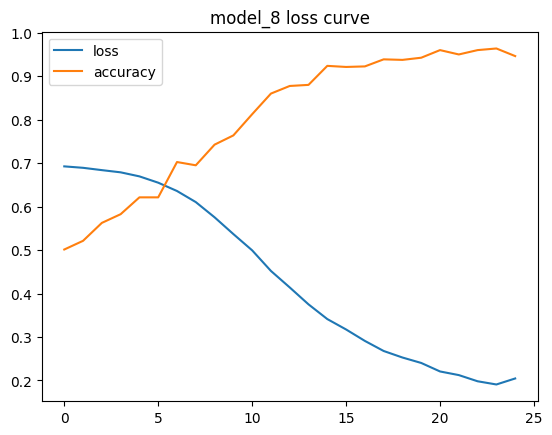

In [48]:
#plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curve")

 🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

# Finding the best learing rate:

To do so, we're going to use the following:
* A [learning rate **callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler).
* You can think of a callback as an extra piece of functionality you can add to your model *while* its training.
* Another model (we could use the same ones as above, we we're practicing building models here).
* A modified loss curves plot.


In [49]:
#set the random seed
tf.random.set_seed(42)

#1.create a model
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

#2.compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])
#3.call back:
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4* 10**(epoch/20))
# traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

#4.fit the model:
history_9=model_9.fit(x_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 5ms/step - loss: 0.6976 - accuracy: 0.4975 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.4950 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.5013 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

<Axes: xlabel='epochs'>

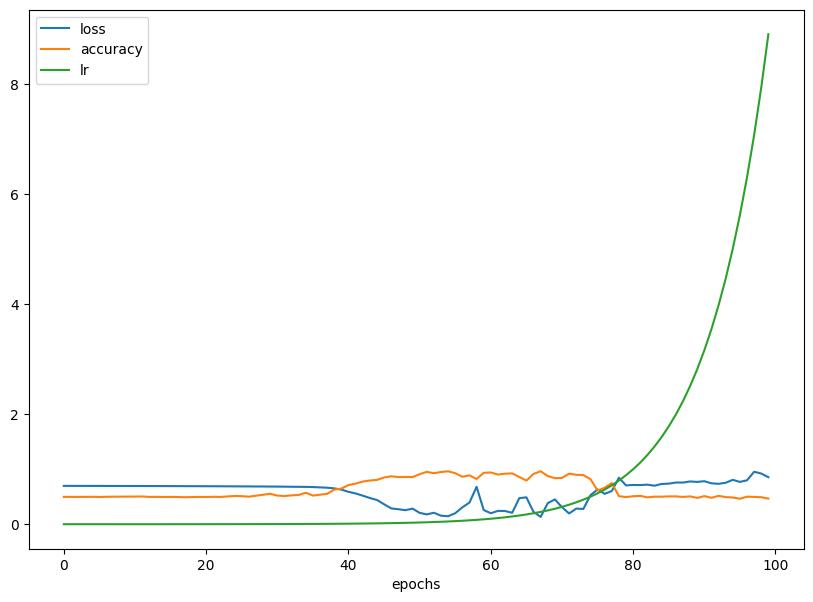

In [50]:
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'learning rate vs. loss')

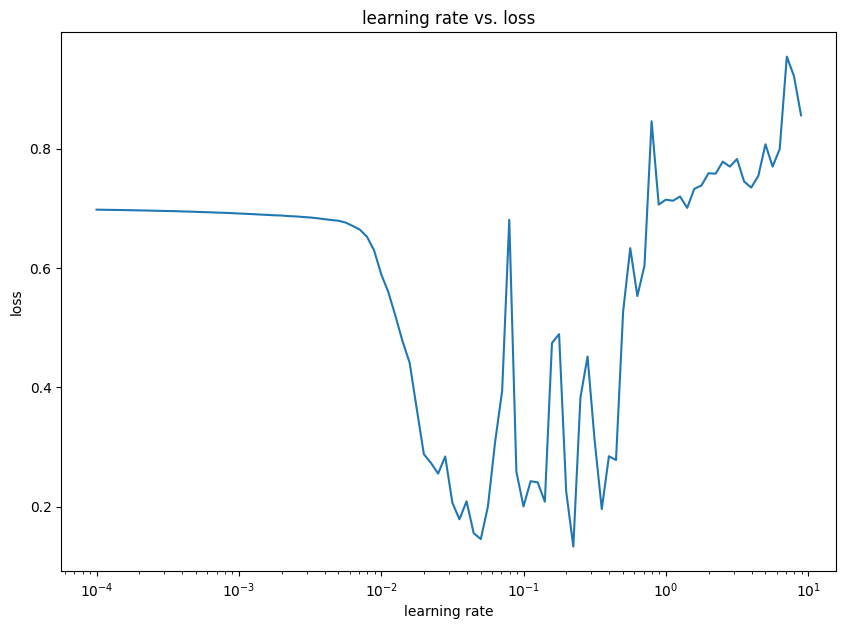

In [51]:
#plot the learning rate versus the loss
lrs=1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs. loss")

Now we've estimated the ideal learning rate (we'll use `0.02`) for our model, let's refit it.

In [52]:
#set the random seed
tf.random.set_seed(42)

#create a model
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

#compile the model:
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(0.02),
                 metrics=["accuracy"])

##.fit the model with 20 epochs( 5 less than before model)
history_10=model_10.fit(x_train,y_train,epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 1ms/step - loss: 0.6924 - accuracy: 0.5113
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5213
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6737 - accuracy: 0.5738
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6583 - accuracy: 0.5975
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.6250
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6062 - accuracy: 0.6787
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5706 - accuracy: 0.7063
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5257 - accuracy: 0.7812
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4805 - accuracy: 0.8213
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8363
Epoch 11/20
25/25 [

In [53]:
#evaluate model 10 on test data
model_10.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9450


[0.2052237093448639, 0.9449999928474426]

In [54]:
model_8.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9700


[0.15721769630908966, 0.9700000286102295]

313/313 [==============================] - 0s 824us/step
doing binary classification
313/313 [==============================] - 0s 825us/step
doing binary classification


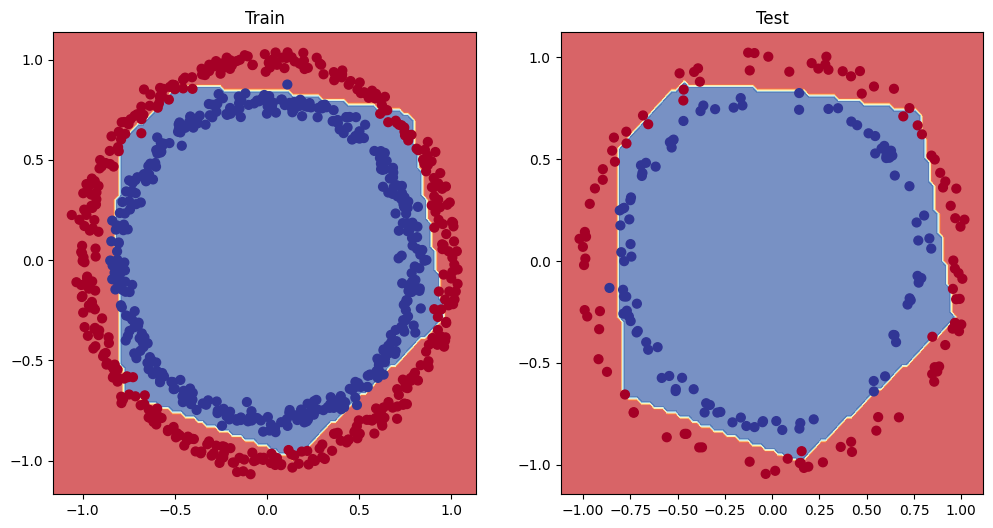

In [55]:
#plot the decision boundaries for trainning and testing data set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,x_test,y_test)


# More Classification matrix:

* Accuracy
* Precision
* recall
* F-1 score
* confusion matrix
* classification report

In [56]:
loss,accuracy=model_10.evaluate(x_test,y_test)
print(f"Model loss on test data:{loss}")
print(f"Model accuracy on test data:{(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9450
Model loss on test data:0.2052237093448639
Model accuracy on test data:94.50%


In [58]:
#creating a confusion matrix:
from  sklearn.metrics import confusion_matrix

#make predictions on test data
y_preds=model_10.predict(x_test)

#create confusion matrix
confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 1ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [59]:
#lets see test data:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [60]:
#lets see the predicctions:
y_preds[:10]

array([[0.89222246],
       [0.89222246],
       [0.89222246],
       [0.89222246],
       [0.17367516],
       [0.00168395],
       [0.89222246],
       [0.1818644 ],
       [0.89222246],
       [0.13319662]], dtype=float32)

oops ...its seems to be our model predictions are come out as **probability form** ....the standred output of sigmoid function (or softmax functions)



In [61]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [62]:
confusion_matrix(y_test,tf.round(y_preds))

array([[91, 10],
       [ 1, 98]])

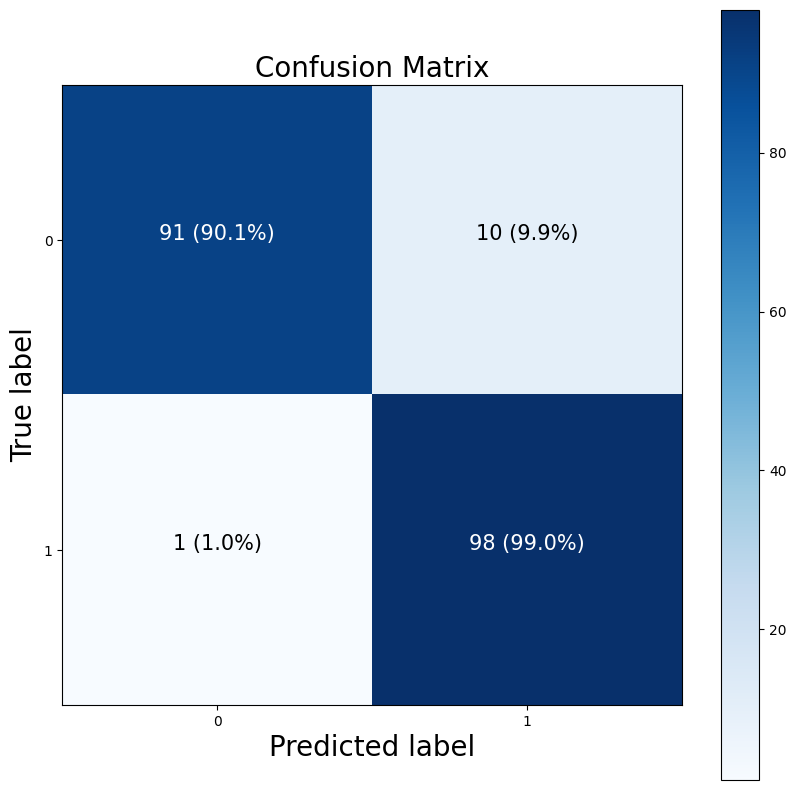

In [63]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working On Large Model(multiclass classification):

In [64]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#the data has been already seperated train and test set
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [65]:
#show first some samples
print(f"Tranning samples:/n{train_data[0]}/n")
print(f"Tranning labels:{train_labels[0]}")

Tranning samples:/n[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [66]:
#check the shape of single example
train_data[0].shape,train_labels[0].shape


((28, 28), ())

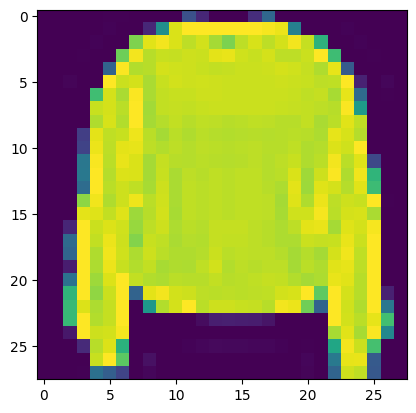

In [67]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7])


In [68]:
train_labels[7]

2

In [69]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'Dress')

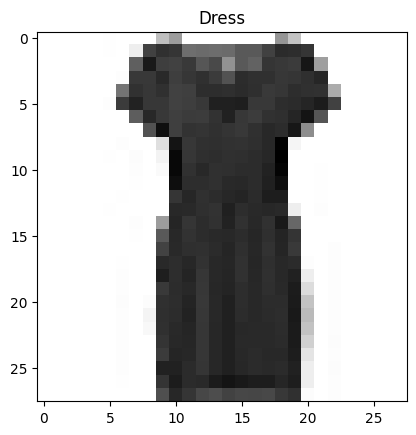

In [70]:
#plot an example image and its labels
index_of_choice=20
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

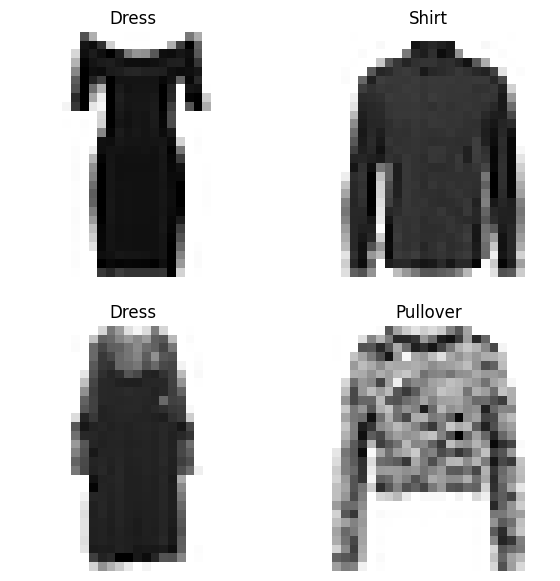

In [71]:
#plot ultiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

# Building a multi-class classification model:

for our multi class classification model we can use a similar architecture to our binary classifiers,however some things:

* Input shape= 28 x 28 (the shape of one image )
* output shape= 10(one per class of clothing)
* loss function=tf.keras.losses.CategoricalCrossentropy():
  * if your labels are one-hot encoded use categoricalcrossentropy()
  * if your labels are not one hot encoded use SparseCategoricalentropy()
* output layer activation=Softmax(not sigmoid)


In [72]:
#set random seed
tf.random.set_seed(42)

#create the model
model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax) #activation function is softmax
])

#compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),#when labels are not one hot encoded then use SparseCategoricalentropy
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#fit the model:
non_norm_history=model_11.fit(train_data,
                              train_labels,
                              epochs=10,
                              validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3036 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [73]:
#check the model summary
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 4)                 3140      
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

neural network prefers data to be normalized or scaled.mean numbers in tensors tries to find the patterns between 0 and 1


In [75]:
#dividing the training and testing data by max
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

#lets maximum and minimum
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [76]:
#now  our data is normalized lets build a model

#set random seed
tf.random.set_seed(42)

#create a model same as model 11:
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#compile the model:
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])
# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6668 - accuracy: 0.3401 - val_loss: 1.2185 - val_accuracy: 0.4915
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0270 - accuracy: 0.6188 - val_loss: 0.9188 - val_accuracy: 0.6821
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8433 - accuracy: 0.6969 - val_loss: 0.8247 - val_accuracy: 0.6976
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7753 - accuracy: 0.7193 - val_loss: 0.7621 - val_accuracy: 0.7334
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7103 - accuracy: 0.7439 - val_loss: 0.7157 - val_accuracy: 0.7441
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6751 - accuracy: 0.7536 - val_loss: 0.7035 - val_accuracy: 0.7523
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6443 - accuracy: 0.7718 - val_loss: 0.6964 - val_accuracy:

<Axes: title={'center': 'normalized_data'}>

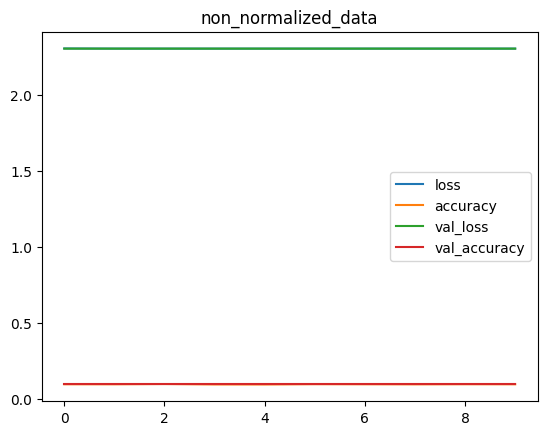

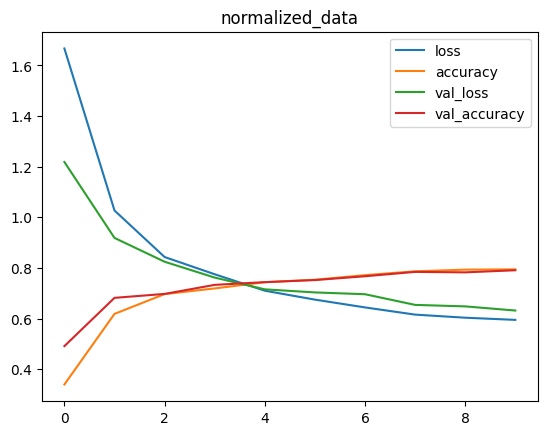

In [77]:
import pandas as pd
#lets plot loss curve for non normalized and normalized data
pd.DataFrame(non_norm_history.history).plot(title="non_normalized_data")
pd.DataFrame(norm_history.history).plot(title="normalized_data")


> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

# Finding ideal learning rate:

In [78]:
#set random seed
tf.random.set_seed(42)

#create a model same as model 11:
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#compile the model:
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

#create the learning rate call back:
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3* 10**(epoch/20))


# Fit the model (to the normalized data)
find_lr_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=40,
                            validation_data=(test_data_norm, test_labels),
                            callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1452 - accuracy: 0.5805 - val_loss: 0.7591 - val_accuracy: 0.7278 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6952 - accuracy: 0.7469 - val_loss: 0.6939 - val_accuracy: 0.7524 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6498 - accuracy: 0.7628 - val_loss: 0.6791 - val_accuracy: 0.7430 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6240 - accuracy: 0.7731 - val_loss: 0.6296 - val_accuracy: 0.7709 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6020 - accuracy: 0.7809 - val_loss: 0.6225 - val_accuracy: 0.7755 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5874 - accuracy: 0.7866 - val_loss: 0.6565 - val_accuracy: 0.7587 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 2s

Text(0.5, 1.0, 'finding the best learning rate')

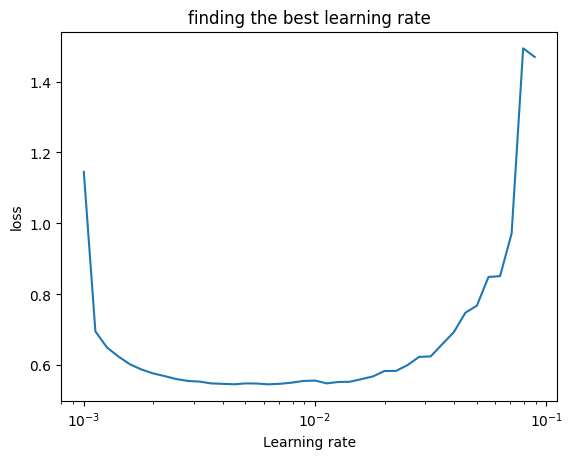

In [90]:
#ploting the learning rate  decay curve:
lrs=1e-3* (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.title("finding the best learning rate")

lets plot at idela rate found(0.001)

In [80]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data_norm,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0434 - accuracy: 0.6133 - val_loss: 0.7557 - val_accuracy: 0.7278
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6994 - accuracy: 0.7552 - val_loss: 0.6971 - val_accuracy: 0.7592
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6514 - accuracy: 0.7716 - val_loss: 0.6619 - val_accuracy: 0.7679
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6296 - accuracy: 0.7790 - val_loss: 0.6380 - val_accuracy: 0.7738
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6180 - accuracy: 0.7826 - val_loss: 0.6424 - val_accuracy: 0.7718
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6092 - accuracy: 0.7845 - val_loss: 0.6405 - val_accuracy: 0.7807
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6050 - accuracy: 0.7850 - val_loss: 0.6332 - val_accuracy:

# Model Evaluation:

* Evaluate its performance using other classification metrics (such as a [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) or [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)).
* Assess some of its predictions (through visualizations).
* Improve its accuracy (by training it for longer or changing the architecture).
* Save and export it for use in an application.

In [81]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
   # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [82]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [83]:
y_probs = model_14.predict(test_data_norm) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[6.72536553e-05, 8.06252444e-14, 2.45551164e-05, 1.99320134e-08,
        1.06802155e-07, 7.49192759e-02, 1.30236494e-05, 1.06317319e-01,
        2.17907466e-02, 7.96867609e-01],
       [2.62748217e-05, 4.83723131e-12, 9.15736437e-01, 8.65045480e-10,
        1.18538896e-02, 1.13165874e-24, 2.81816330e-02, 0.00000000e+00,
        4.42018397e-02, 8.37766010e-17],
       [8.44804526e-06, 9.91576850e-01, 6.47980341e-05, 2.31182482e-03,
        5.87507477e-03, 2.11093231e-15, 1.62974640e-04, 5.76699654e-27,
        5.17582706e-08, 4.62341155e-17],
       [1.71181000e-05, 9.89133239e-01, 1.34019749e-04, 2.98953522e-03,
        7.43993837e-03, 5.59901687e-14, 2.85750430e-04, 9.79478986e-25,
        2.35586086e-07, 9.49003856e-16],
       [1.42338753e-01, 1.15748628e-06, 2.54327714e-01, 7.33567635e-03,
        1.95805430e-02, 7.79322082e-13, 5.60668945e-01, 1.19701361e-28,
        1.57472193e-02, 2.63988102e-11]], dtype=float32)

In [84]:
y_probs[0],tf.argmax(y_probs[0]),class_names[tf.argmax(y_probs[0])]

(array([6.72536553e-05, 8.06252444e-14, 2.45551164e-05, 1.99320134e-08,
        1.06802155e-07, 7.49192759e-02, 1.30236494e-05, 1.06317319e-01,
        2.17907466e-02, 7.96867609e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [85]:
#lets convert all probabilities into integers:
y_preds=y_probs.argmax(axis=1)

#view 10 y_preds
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 2, 5, 7])

In [86]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

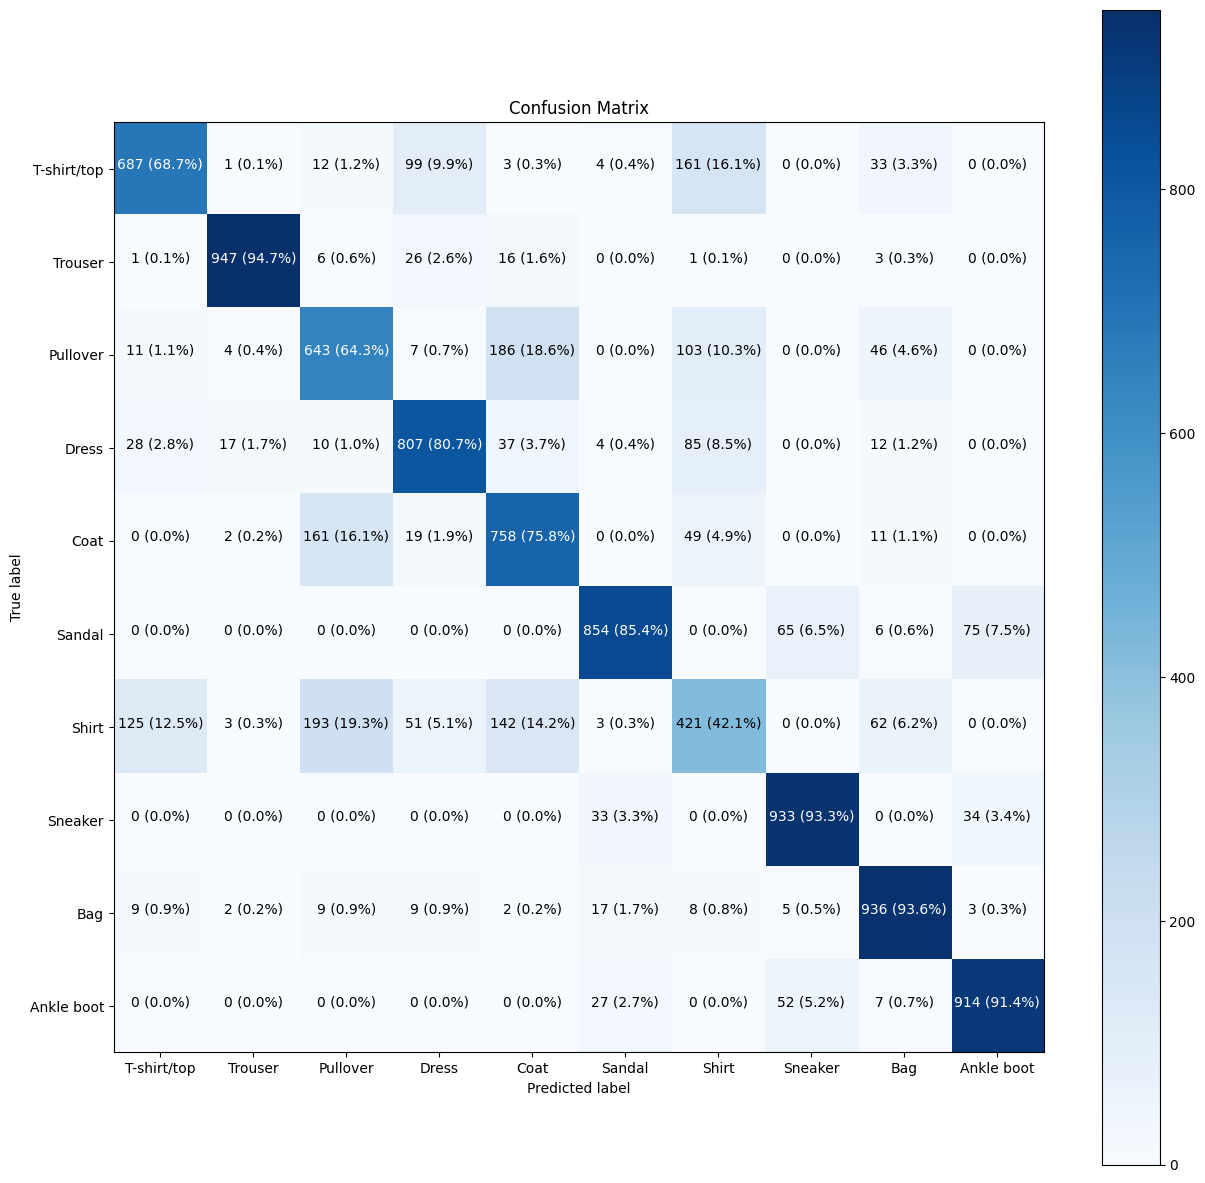

In [87]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

🔑**Note**: often we when working with images and other forms of visual dat,its
  good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputd of your models.

How about we create a fun for:
* plot a random image
* make a prediction on said image
* label the plot with the truth & predicted label


In [88]:
import random

def plot_random_image(model,images,true_labels,classes):
  '''
  picks a random image ,plots it and labels it with a prediction and truth label.
  '''

  #set up random integer
  i=random.randint(0,len(images))

  #create predictions and targets:
  target_image=images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  #plot the image:
  plt.imshow(target_image,cmap=plt.cm.binary)

  #change the color of the titles depending on if the prediction is right or wrong
  if pred_label==true_label:
    color="green"
  else:
    color="red"

  #add xlabel information(predictions/true label):
  plt.xlabel("pred:{} {:2.0f}% (True: {})".format(
                                          pred_label,
                                          100*tf.reduce_max(pred_probs),
                                          true_label),
                                          color=color)#color based on wheather predictions right or wrong


1/1 [==============================] - 0s 13ms/step


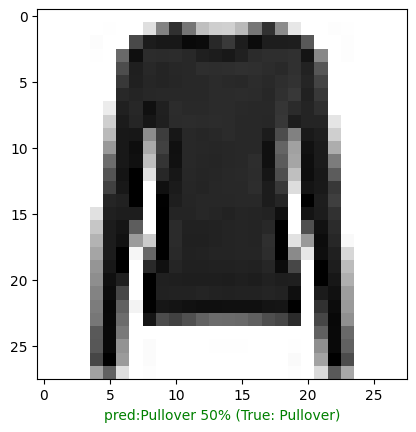

In [91]:
#check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

#What patterns is our model is trainning :

In [92]:
# Find the layers of our most recent model
model_14.layers

In [93]:
# Extract a particular layer
model_14.layers[1]

In [97]:
# Get the patterns of a layer in our network
weights,biases =model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights,weights.shape

(array([[ 0.34250796,  0.45956004, -0.90135545, -0.03253965],
        [-0.58670884,  0.62398565, -0.3991686 ,  0.08560191],
        [ 0.7518222 ,  0.8952855 , -0.8708858 ,  0.07192758],
        ...,
        [ 0.04612737, -0.31412882, -0.41738257,  0.05923913],
        [ 0.39678988, -0.51781106, -0.95887   ,  0.032276  ],
        [ 0.15771481,  0.12295246, -0.19790658, -0.06883438]],
       dtype=float32),
 (784, 4))

In [98]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 4)                 3140      
                                                                 
 dense_38 (Dense)            (None, 4)                 20        
                                                                 
 dense_39 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer (our selected layer has 4 neurons).

Each value in the weights matrix corresponds to how a particular value in the input data influences the network's decisions.

These values start out as random numbers (they're set by the [`kernel_initializer` parameter](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) when creating a layer, the default is [`"glorot_uniform"`](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotUniform)) and are then updated to better representative values of the data (non-random) by the neural network during training.

![neural network supervised learning weight updates](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-fashion-mnist-learning.png)
*Example workflow of how a supervised neural network starts with random weights and updates them to better represent the data by looking at examples of ideal outputs.*

Now let's check out the bias vector.

In [99]:
#bias and bises shape
biases,biases.shape

(array([ 0.5051654 ,  0.6495243 ,  0.8984777 , -0.01925637], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the [`bias_initializer` parameter](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

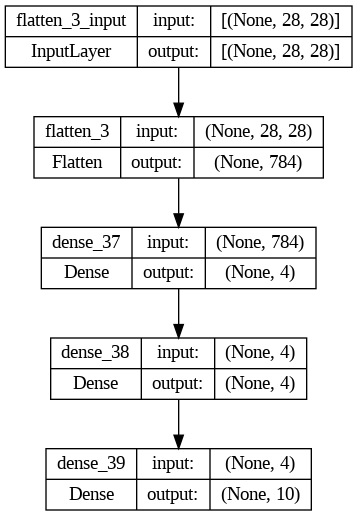

In [100]:
#lets check out another way of viewing pur deep learning models
from tensorflow.keras.utils import plot_model
plot_model(model_14,show_shapes=True)